In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20})

In [22]:
#load the dataset and specify the correct encoding
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin-1')  

In [23]:
# Filter data for a specific artist
artist_name = "Miley Cyrus" 
artist_data = df[df['Artist'] == artist_name]

In [24]:
# Adjust based on the actual date column name
artist_data['date'] = pd.to_datetime(artist_data['Release Date'])  # replace 'date' with actual column name
artist_data['year'] = artist_data['date'].dt.year

/tmp/ipykernel_28468/2659790204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['date'] = pd.to_datetime(artist_data['Release Date'])  # replace 'date' with actual column name
/tmp/ipykernel_28468/2659790204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_data['year'] = artist_data['date'].dt.year


In [25]:
# Group by 'year' and sum the streams/views across platforms
temporal_data = artist_data.groupby('year').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',
    'TikTok Views': 'sum'
}).reset_index()

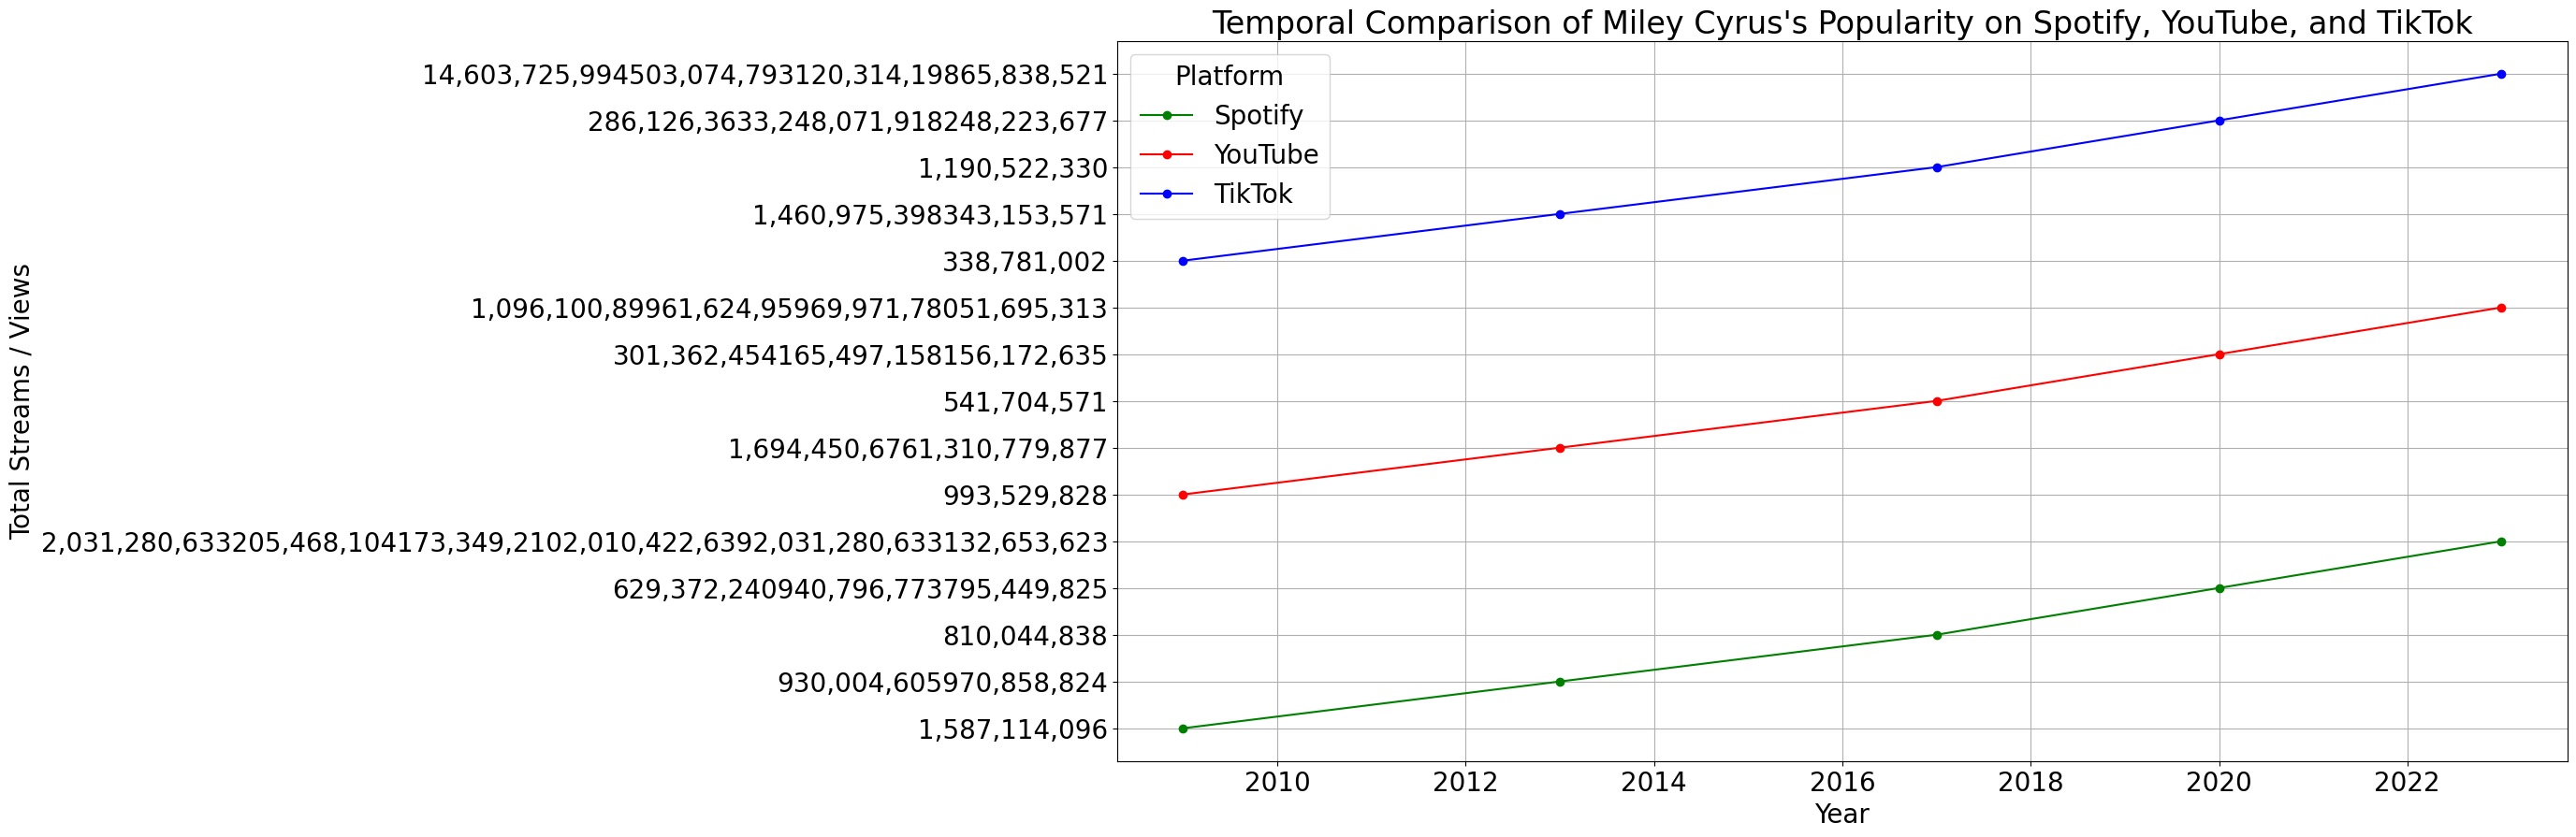

In [26]:
# Plot the data
plt.plot(temporal_data['year'], temporal_data['Spotify Streams'], label='Spotify', color='green', marker='o')
plt.plot(temporal_data['year'], temporal_data['YouTube Views'], label='YouTube', color='red', marker='o')
plt.plot(temporal_data['year'], temporal_data['TikTok Views'], label='TikTok', color='blue', marker='o')

# Add title and labels
plt.title(f"Temporal Comparison of {artist_name}'s Popularity on Spotify, YouTube, and TikTok")
plt.xlabel("Year")
plt.ylabel("Total Streams / Views")
plt.legend(title="Platform")

# Show plot
plt.grid(True)
plt.show()